| tabel 1 | 123 | 456 |
| --- | --- | --- |
| Stretched | Gaussian | .843 |


# nonlinear dynamics and control
<html>
<body>    

<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
        Nonlinear dynamics and control: systems of first order ODEs
                   </font>
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
        Background:
        <ul>
            <li>Ordinary differential equations</li>
            <li>Numerical methods</li>
            <li>Transport Phenomena</li>
        </font>    
        </ul>  
    </td>
</tr>
</table>
</body>
</html>    


# nonlinear dynamics and control

<html>
<body>    

<table style="width:50%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
        <font size="10">
        Nonlinear dynamics and control: systems of first order ODEs
                   </font>
    </td>
</tr>
</table>
</body>
</html>    


<html>
<body>    

<table style="width:50%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;">
        <font size="5">
        Background:
        <ul>
            <li>Ordinary differential equations</li>
            <li>Numerical methods</li>
            <li>Transport Phenomena</li>
        </font>    
        </ul>  
    </td>
</tr>
</table>
</body>
</html>    


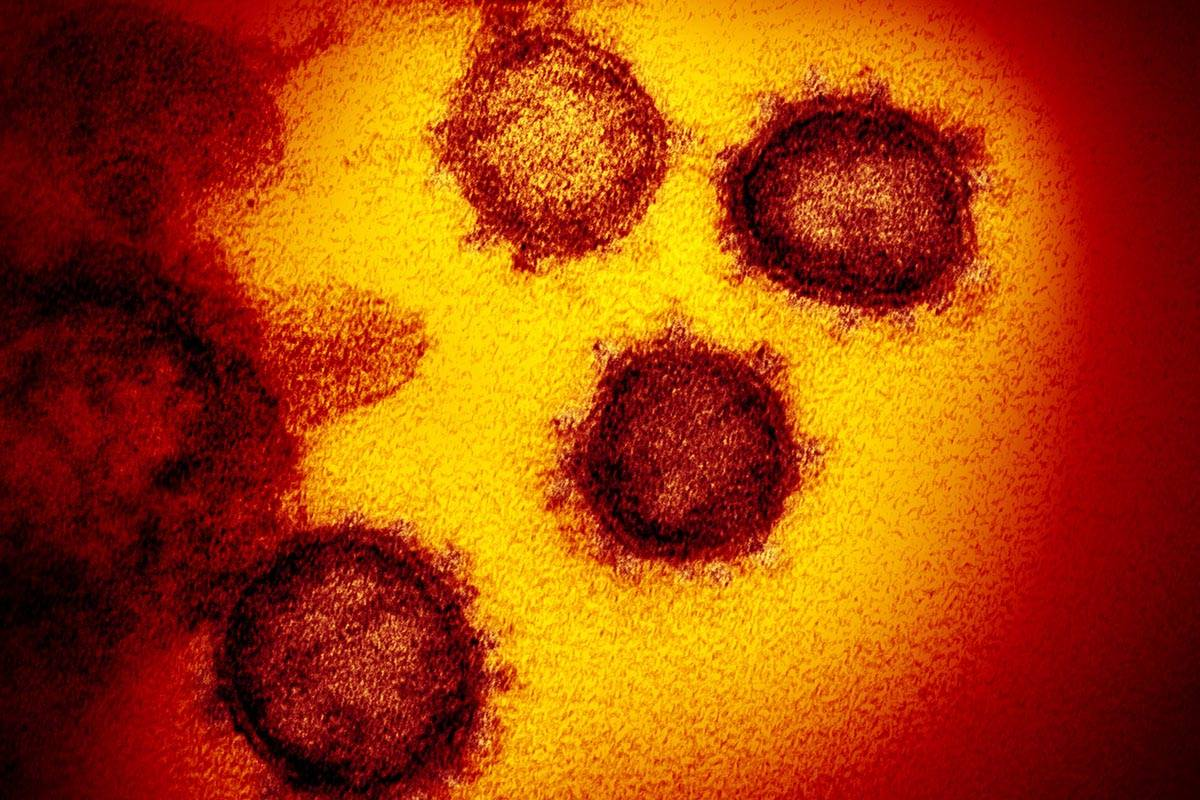

In [1]:
#hideme
from IPython.display import Image, display

listOfImageNames = ['/home/nijso/covid19-seir/coronavirus_EM.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName,width=250))

In [2]:
#%matplotlib inline

import matplotlib.pyplot as plt
from ipywidgets import interact

import ipywidgets as widgets

import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib as mpl
#import matplotlib.pyplot as plt
from datetime import timedelta, datetime
# for nan
#import math

#S_0 = 15000
#population size
N = 1000000
I_0 = 10
R_0 = 0
S_0 = N - I_0 - R_0

# nr of points
size=72


# beta = transmission rate [number per day]
beta = 0.4

# gamma = 1/infectuous period = 1/T, T=5 days
gamma = 0.2

#R = beta/gamma


#def f(x):
#    return x
#        
##interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));
#interact(f, x=widgets.FloatSlider(min=0.4,max=0.6,step=0.01,value=0.5))

# @ means its a decorator, functions are called implicitly
@interact(beta=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.4),gamma=widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.2))
def sirsol(beta,gamma):

    
    def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I/N, beta*S*I/N - gamma*I,gamma*I]

    
    #beta=n
    SIR_sol = solve_ivp(SIR, [0, size], [S_0,I_0,R_0], t_eval=np.arange(0, size, 0.5))

    #index = confirmed.index
    #print("index = ",index)
    #print 
    #x=np.arange(len(new_index))
        
    fig = plt.figure()
    ax = plt.subplot(111)
        
    plt.rcParams["figure.figsize"] = [12,12]
    plt.rcParams["axes.linewidth"] = 2.0
    plt.rcParams['lines.linewidth'] = 5
    plt.rcParams['lines.markersize'] = 10
    plt.rcParams['lines.markeredgecolor'] = 'black'

    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12

        
    plt.xticks([0,7,14,21,28,35,42,49,56,63,70],['start outbreak','week 1','week 2','week 3','week 4','week 5','week 6','week 7','week 8','week 9','week 10'],rotation=45)
       

    plt.plot(SIR_sol.t,SIR_sol.y[0],label='Susceptible S')
    #plt.plot(prediction.y[1],label='predicted exposed E')
    plt.plot(SIR_sol.t,SIR_sol.y[1],label='Infected I')
    plt.plot(SIR_sol.t,0.96*SIR_sol.y[2],label='Recovered R')
    plt.plot(SIR_sol.t,0.04*SIR_sol.y[2],label='Deaths D')
    ax.legend(loc='upper left', frameon=False)

    plt.show()
    
    
    


interactive(children=(FloatSlider(value=0.4, description='beta', max=2.0, min=0.1), FloatSlider(value=0.2, des…